## Introducción a Machine Learning

Hay dos tipos de aprendizaje supervisado: clasificación y regresión. La clasificación binaria se utiliza para predecir una variable objetivo que solo tiene dos etiquetas, normalmente representadas numéricamente con un cero o un uno.

## Modelo Supervisado - Clasificación

#### Sckit-learn Syntax
Flujo de trabajo repetible para utilizar modelos de aprendizaje supervisado:

```python
from sklearn.module import Model #Importación de modelo para aprendizaje automatico.
model = Model() #instanciación del modelo 
model.fit(X, y) #Se ajusta el modelo a los datos. X = Valores de las caracteristicas, y = Valores objetivos
predictions = model.predit(X_new) #Se crea la predicción con nuevas observaciones [X_new]
print(predictions) #Impresion de predicciones
```

#### Clasificación de etiquetas de datos no vistos

1. Construir un modelo
2. El modelo aprende de los datos etiquetados que le pasamos
3. Pasar datos no etiquetados al modelo como entrada
4. El modelo predice las etiquetas de los datos no vistos

### K-nearest Neighbors

Predecir la etiqueta de un punto de datos:
- Observando los k puntos de datos etiquetados más cercanos.
- Tomando una votación mayoritaria.

#### Ejemplo: 

¿Como se clasifica la observación negra?

<img src="images/imagen1.png" width="40%">

##### Respuesta
Si k = 3 se clasificaria como roja, porque 2 de las tres observaciones mas cercanas es igual a roja.

#### Scikit-learn

In [10]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

churn_df = pd.read_csv("../data/telecom_churn_clean.csv")

X = churn_df[["total_day_charge", "total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X, y)
X_new = np.array([ [56.8 , 17.5], [24.4 , 24.1], [50.1, 10.9] ]) #3 Observaciones y 2 caracteristicas.
print(X_new.shape)
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

(3333, 2) (3333,)
(3, 2)
Predictions: [1 0 0]


## Medición del rendimiento del modelo
En la clasificación, la precisión es una métrica de uso común.

**Precisión:** predicciones correctas / observaciones totales

- Se pudo calcular la precisión de los datos utilizados para ajustar el clasificador.
- NO indica capacidad de generalización.

<img src="images/imagen2.png" width="80%">

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
"""
test_size: 30% del total de los datos para pruebas.
random_state: establece semilla para conjunto de numeros aleatorios, para división de datos.
stratify: estratificación para asegurarse que la división refleja la proporcion de etiquetas en los datos.

train_test_split: retorna 4 arreglos: los datos de entrenamiento, los datos de prueba, las etiquetas de entrenamiento, las etiquetas de pruebas.
"""
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test)) # Para conocer la precisión se usa el metodo score

0.872


<img src="images/imagen3.png" width="70%">

En la gráfica podemos ver **límites de decisiones** a medida que `k` cambia; los **límites de decisión** son umbrales que sirven para determinar qué etiqueta asigna un modelo a una observación.
Por el comportamiento se puede visualizar que es un modelo mas simple, ya que tienen menos capacidad para detectar relaciones en el conjunto de datos (infrajuste).
Los modelos complejos suelen ser sensibles al ruido de los datos de entrenamiento, en lugar de reflejar tendencias generales, esto se conoce como sobreajuste.

- Un valor k mayor = modelo menos complejo = puede causar subajuste.
> Larger k = less complex model = can cause underfitting.
  
- Un valor k menor = modelo más complejo = puede causar sobreajuste.
> Smaller k = more complex model = can lead to overfitting.

#### Complejidad del modelo y sobreajuste/subajuste

In [12]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies [neighbor] = knn.score(X_train, y_train)
    test_accuracies [neighbor] = knn.score(X_test, y_test)

#### Graficando los resultados

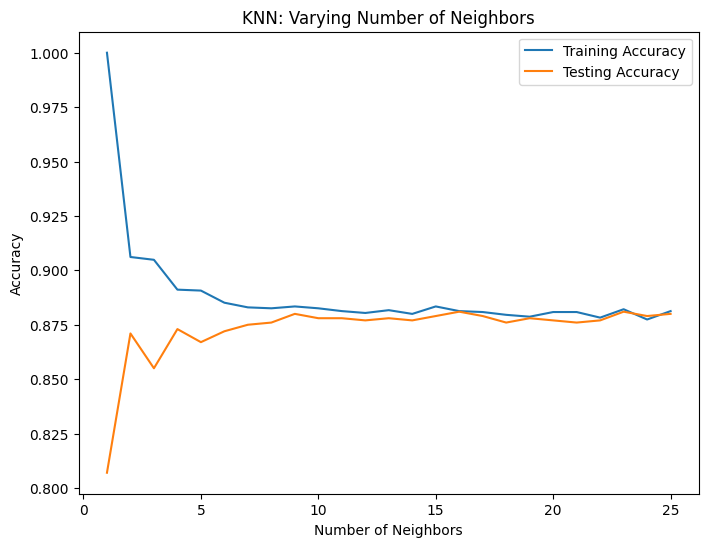

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")

plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()